# **Donor forecasting**
#### *By Jennifer Loaiza*

<p> Over time blood donation has been a gift to many people who need it for their lives, so predicting the blood supply is a serious and recurring problem for blood collection administrators.<p>
<p> Therefore, this paper will take a random sample donor database from the Blood Transfusion Service Center in Hsin Chu City, Taiwan, to predict the people who did donate in March 2007 using various classification models.<p>
<p> The data set has 748 observations and 5 variables. These variables are divided into <code>Recency (months)</code> indicating the months since the last time you donated blood, <code>Frequency (times)</code> which reflects the number of times you have donated blood, <code>Monetary (c.c. blood)</code> indicates the amount of blood represented in cubic centimeters (c.c.), <code>Time (months) </code> the number of months that have elapsed since your first donation, and <code>whether he/she donated blood in March 2007</code> a binomial variable indicating 1 if you donated in March 2007 and 0 if you did not donate by that date.<p>

In [2]:
# Import of the library

from sklearn.metrics import classification_report 
from sklearn.metrics import roc_auc_score 
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict 
from sklearn.tree import DecisionTreeClassifier
from tabulate import tabulate 
from xgboost import XGBClassifier
import xgboost as xgb
import numpy as np
import matplotlib.colors as mcolors 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

In [3]:
# Data set

data = pd.read_csv('transfusion.data', na_values=['', 'NA', 'N/A', 'NaN', 'null'])

## **1. Exploratory analysis**

<p>As mentioned above, the data set has 5 features and 748 values, all features are floats and there are no null values. For characteristic <code> whether he/she donated blood in March 2007</code> the donor represent 23.7% of the sample, which should already be considered when estimating the model to balance the data. <p>

<p> Therefore, in descriptive statistics there is a high standard deviation, which means that it is close to or above the mean. This indicates that there could be outliers that need to be treated.<p>

In [4]:
# Number of columns and rows

print(f'The columns and rows numbers are {data.shape[1]} and {data.shape[0]} ')

The columns and rows numbers are 5 and 748 


In [5]:
# Types of features

print(f'Types of features: {data.dtypes}') 

Types of features: Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object


In [6]:
# Null values

print(f' These are the null values in the dataset : {data.isnull().sum()}')

 These are the null values in the dataset : Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64


In [7]:
# Change columns names

data.columns = ['recency', 'frecuency', 'monetary', 'time', 'donor']

# División del cojunto de donadores y no donadores

data_donor = data[data['donor'] == 1]
data_no_donor = data[data['donor'] == 0]

In [8]:
# Summary of dataset

data.describe()

,recency,frecuency,monetary,time,donor
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


### **Data distribution**

<p>  Frequency and monetary are perfectly linear, i.e., each time an individual donates blood (frequency) the same amount of blood is drawn each time he/she does so. In effects for the model it will only be necessary to have one of these two variables to estimate the model. On the other hand, in the correlation matrix of the original data set there is a positive relationship between recency, if the months of waiting since the last donation increases then there is a high probability that he was a donor by March 2007, the opposite is the case for the frequency and monetary variables.<p>

<p> In addition, there is a notable disparity between donors and non-donors. Donors have made contributions more frequently and have devoted considerable time to this activity since their first donation. Those who have not donated until recently have a shorter period since their last contribution.</p>

(-1.0999999342621816,
 1.0999999816886403,
 -1.0999996036709268,
 1.0999917350768893)

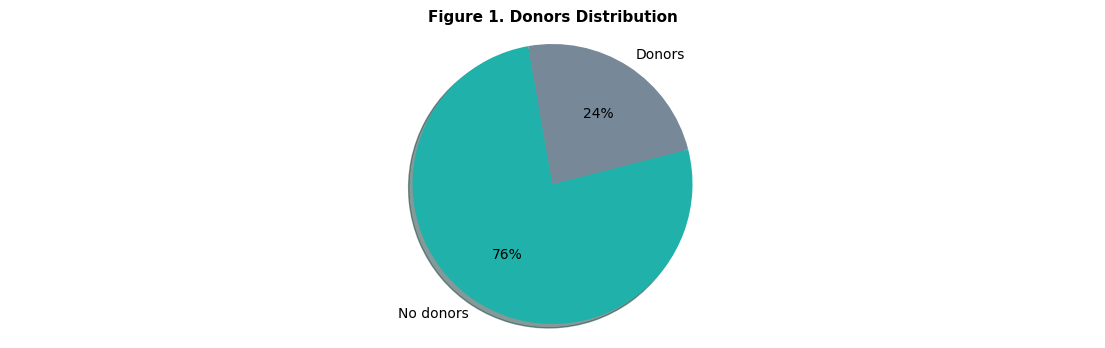

In [9]:
# pie chart

custom_labels = ['No donors', 'Donors'] # Labels

plt.figure(figsize=(14, 4)) # Pie size

donor_values = data['donor'].value_counts().values # Values counts 

plt.pie(donor_values, labels=custom_labels, colors=["#20B2AA", "#778899"], shadow=True, startangle=100, autopct='%1.0f%%') # graphic
plt.title("Figure 1. Donors Distribution", fontsize=11, fontweight='bold') # Title
plt.axis('equal')


In [10]:
def histogram(data, column, titulo, color_hist):
    # Nombres para las bases de datos
    
    plt.hist(data[column], bins=30, color=color_hist)
    plt.title(titulo, fontsize=8, fontweight='bold')
    plt.xlabel(column, fontsize=9)
    plt.ylabel('Frecuency', fontsize=9)
    plt.grid(True)     



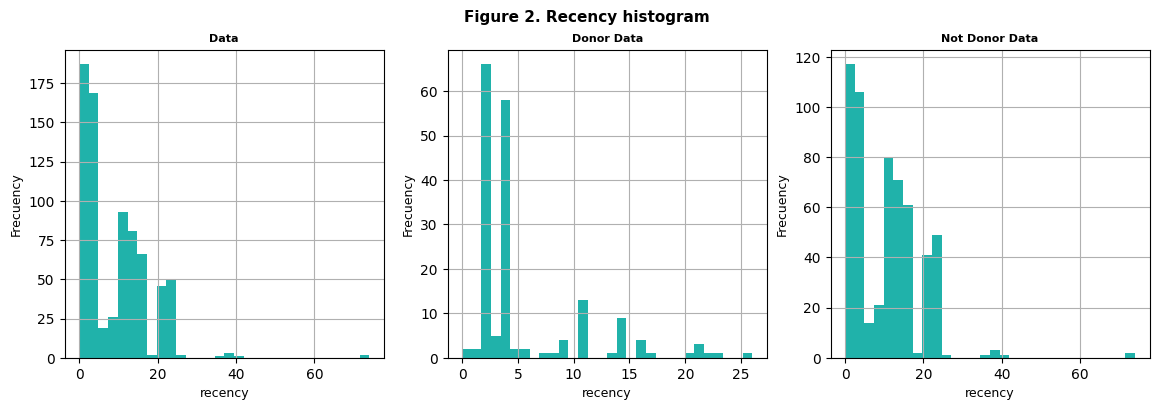

In [11]:
plt.figure(figsize=(14, 4))

plt.suptitle("Figure 2. Recency histogram ", fontsize=11,fontweight='bold')

plt.subplot(1,3,1)
histogram(data, 'recency', 'Data', '#20B2AA')

plt.subplot(1,3,2)
histogram(data_donor, 'recency', 'Donor Data', '#20B2AA')

plt.subplot(1,3,3)
histogram(data_no_donor, 'recency', 'Not Donor Data', '#20B2AA')

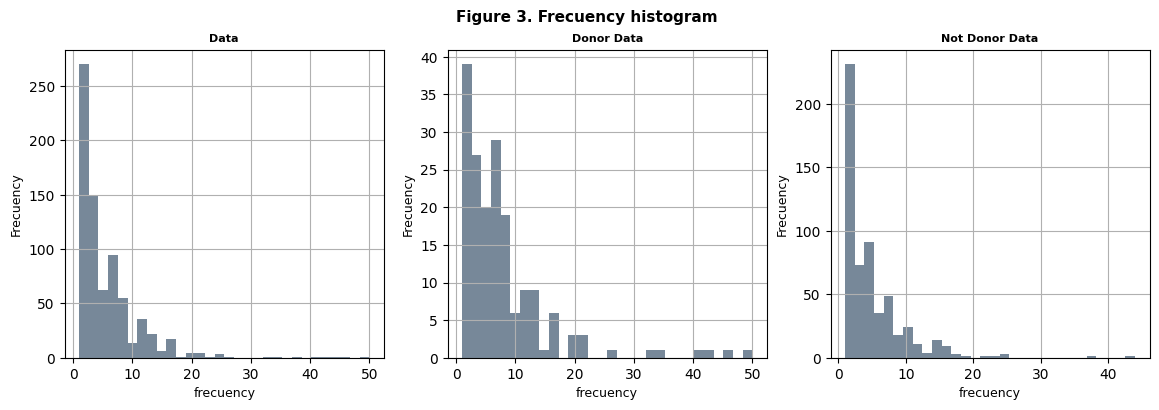

In [12]:
plt.figure(figsize=(14, 4))

plt.suptitle("Figure 3. Frecuency histogram ", fontsize=11,fontweight='bold')

plt.subplot(1,3,1)
histogram(data, 'frecuency', 'Data', '#778899')

plt.subplot(1,3,2)
histogram(data_donor, 'frecuency', 'Donor Data', '#778899')

plt.subplot(1,3,3)
histogram(data_no_donor, 'frecuency', 'Not Donor Data', '#778899')

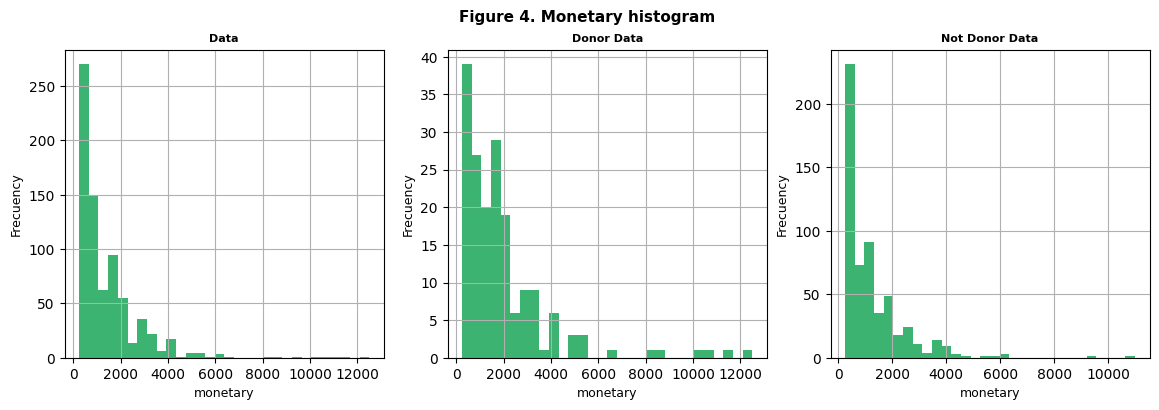

In [13]:
plt.figure(figsize=(14, 4))

plt.suptitle("Figure 4. Monetary histogram ", fontsize=11,fontweight='bold')

plt.subplot(1,3,1)
histogram(data, 'monetary', 'Data', '#3CB371')

plt.subplot(1,3,2)
histogram(data_donor, 'monetary', 'Donor Data', '#3CB371')

plt.subplot(1,3,3)
histogram(data_no_donor, 'monetary', 'Not Donor Data', '#3CB371')

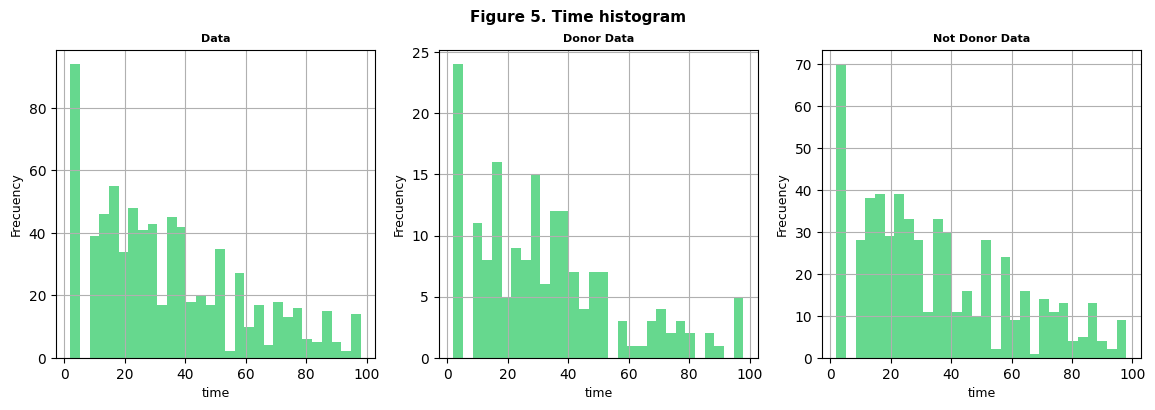

In [14]:
plt.figure(figsize=(14, 4))

plt.suptitle("Figure 5. Time histogram ", fontsize=11,fontweight='bold')

plt.subplot(1,3,1)
histogram(data, 'time', 'Data', '#66D88E')

plt.subplot(1,3,2)
histogram(data_donor, 'time', 'Donor Data', '#66D88E')

plt.subplot(1,3,3)
histogram(data_no_donor, 'time', 'Not Donor Data', '#66D88E')

Text(0.5, 1.05, 'Figure 6. Correlations')

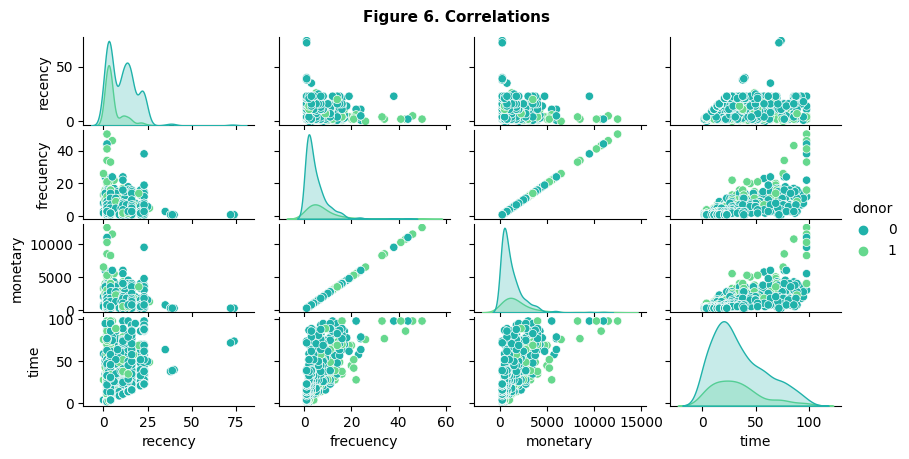

In [15]:
# recency, frecuency, monetary and time correlation

sns.pairplot(data, hue='donor', palette=['#20B2AA', '#66D88E'])

plt.gcf().set_size_inches(9,4)

plt.suptitle('Figure 6. Correlations', fontsize=11,fontweight='bold', y = 1.05)

## **2. Identification and treatment of outliers**

<p> The box-and-whisker plots reveal the presence of data outside the interquartile range. The recency, frequency and monetary variables are the outliers with outliers of 0.9%, 6% and 6%, respectively. Since the sample is relatively small, it was decided to take these outliers and replace them with the maximum value of the interquartile range. Once the data were modified, the original data set had no outliers. <p>

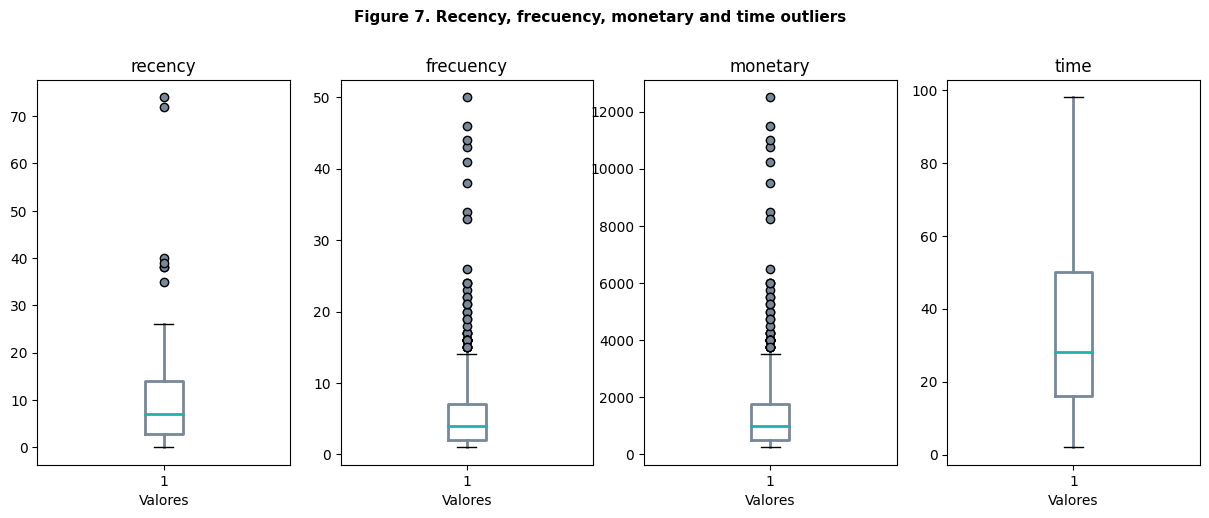

In [16]:

def plot_boxplots(data, variable_names, title):

    
    num_variables = len(variable_names)
    plt.figure(figsize=(15, 5))  
    
    for i, var_name in enumerate(variable_names, start=1):
        plt.subplot(1, num_variables, i)
        boxprops = dict(linewidth=2, color='#778899')  
        whiskerprops = dict(linewidth=2, color='#778899') 
        medianprops = dict(linewidth=2, color='#20B2AA', linestyle='-')
        flierprops = dict(marker = "o", markerfacecolor = "#778899")
        plt.boxplot(data[var_name], vert=True, boxprops=boxprops, whiskerprops=whiskerprops, medianprops=medianprops, flierprops= flierprops)
        plt.xlabel('Valores')
        plt.title(var_name)
        plt.suptitle(title, fontsize=11, fontweight='bold', y=1.02)

variable_names = ['recency', 'frecuency', 'monetary', 'time']  # Corregí el nombre de la variable 'frecuency' a 'frequency'
plot_boxplots(data, variable_names, 'Figure 7. Recency, frecuency, monetary and time outliers')
plt.show()


In [17]:
# Percentage of outliers

def outliers_percentage(data, column):

    '''
    Description: This function obtains the percentage of outliers of a variable.

    input: 
    ----> data: DataFrame = > This is a dataset
    ----> column: int or float = > This is the variable on which the percentage of outlier data will be extracted. 

    output: 
    ----> outlier_percentage: float = > This is the variable yields the percentage of outliers there are in the variable 
                                        cough you want how many oytlier there are 

    '''
    
    Q1 = data[column].quantile(0.25) # Quatile 25
    Q3 = data[column].quantile(0.75) # Quatile 75

    IQR = Q3 - Q1 # interquartile range

    lower_limit = Q1 - 1.5 * IQR  # Lower limit of the interquartile range
    upper_limit = Q3 + 1.5 * IQR  # Upper limit of the interquartile range

    
    outliers = data[(data[column] < lower_limit) | (data[column] > upper_limit)] # number of outliers

    outlier_percentage = (len(outliers) / len(data[column])) * 100 # Percentage of outliers

    return outlier_percentage


recency_percentage = outliers_percentage(data, 'recency')
frecency_percentage = outliers_percentage(data, 'frecuency')
monetary_percentage = outliers_percentage(data, 'monetary')

print('Percentage of outliers')
print(f"Percentage of outliers in recency: {recency_percentage:.2f}%")
print(f"Percentage of outliers in frecency: {frecency_percentage:.2f}%")
print(f"Percentage of outliers in monetary: {monetary_percentage:.2f}%")


Percentage of outliers
Percentage of outliers in recency: 0.94%
Percentage of outliers in frecency: 6.02%
Percentage of outliers in monetary: 6.02%


In [18]:
def replace_outliers(data, column):

    '''
    Description: This function replace the outliers with the lower or upper limit of the interquartile rang

    input: 
    ----> data: DataFrame = > This is a dataset
    ----> column: int or float = > This will be the variable to replace the outlier data.
        
    '''
    
    Q1 = data[column].quantile(0.25) # Quatile 25
    Q3 = data[column].quantile(0.75) # Quatile 75

    IQR = Q3 - Q1 # interquartile range

    lower_limit = Q1 - 1.5 * IQR  # Lower limit of the interquartile range
    upper_limit = Q3 + 1.5 * IQR  # Upper limit of the interquartile range

    # Replace outliers with maximum or minimum data of the interkertile interval.
    data[column] = np.where((data[column] < lower_limit) | (data[column] > upper_limit),
                             upper_limit, data[column])


replace_outliers(data, 'recency')
replace_outliers(data, 'frecuency')
replace_outliers(data, 'monetary')

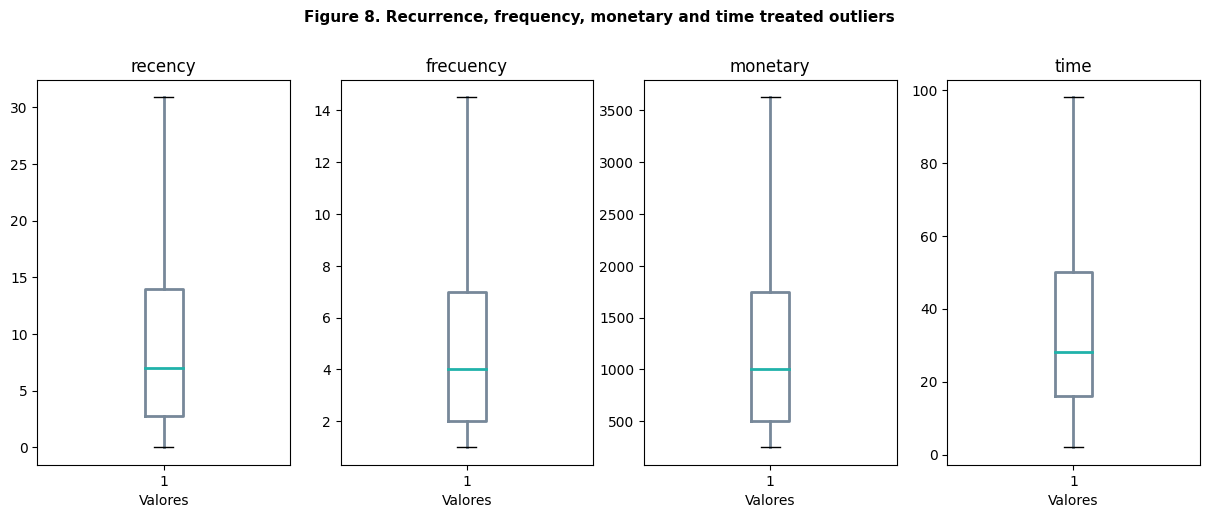

In [19]:
plot_boxplots(data, variable_names, 'Figure 8. Recurrence, frequency, monetary and time treated outliers')

## **3. Data preparation**

<p> The frequency variable is eliminated in the X matrix because of the high correlation with monetary. The values that have 0 are replaced by 0.001 in the recency column in order to take the natural logarithm of the variables and this is not an error, in order to improve the standard error.<p>

<p> As there is an imbalance in the data due to the large proportion of non-donors in the sample, an oversampling is performed so that the number of donors and non-donors have the same size.<p>

In [20]:
# Replace the values 0 by 0.001
data['recency'] = data['recency'].replace(0, 0.001)

# Division of data between donors and non-donors
donor = data[data['donor'] == 1]
no_donor = data[data['donor'] == 0]

# Increased donor sample size relative to non-donor sample size
donor = donor.sample(no_donor.shape[0], random_state=10, replace=True)

# Union of the two samples
balanced_donors = pd.concat([donor, no_donor])


In [21]:

# Creation of the training variables y and x
X = balanced_donors.drop(columns=['donor', 'frecuency'], axis=1)
y = balanced_donors['donor']

# Natural logarithm to the training and test x variables
X = np.log(X)

# Creación de los datos de entrenemiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=10) 

## **3. Machine learning model**

<p> Decision trees and XGboost are used for the machine learning model because of their significant advantages. Decision trees are notable for their simplicity and interpretability, making them ideal tools for understanding and communicating patterns in complex data. In addition, decision trees are fast to train and apply, making them suitable for tasks that require quick responses. Their flexibility and versatility make them an attractive choice for exploratory data analysis. <p>

<p> On the other hand, XGBoost is a powerful choice when looking for exceptional performance on machine learning problems. Its incremental learning capabilities and feature selection and regularization techniques make it a valuable tool in solving complex problems. XGBoost is especially effective in classification and regression tasks, where it has demonstrated superior performance in machine learning competitions and real-world applications.<p>

### **3.1. Xboost Model**

In [22]:
# XBboost Model

# Parameters XBboost Model

params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 50
}

num_round = 50

 # Tranformation variables X test and train

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# XGboost Model
model_xgb = xgb.train(params, dtrain, num_round)

y_pred_xgb = model_xgb.predict(dtest)

y_pred_xgb_binary = [1 if x >= 0.5 else 0 for x in y_pred_xgb]
class_xgb = classification_report(y_test, y_pred_xgb_binary)
auc_roc_xgb = roc_auc_score(y_test, y_pred_xgb_binary)
print("XGBoost: \n", class_xgb)



XGBoost: 
               precision    recall  f1-score   support

           0       0.78      0.72      0.75       149
           1       0.71      0.77      0.74       136

    accuracy                           0.74       285
   macro avg       0.74      0.75      0.74       285
weighted avg       0.75      0.74      0.74       285



c:\Users\Jennifer\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:28:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


### **3.2. Decision Tree Classsifier**

In [23]:
# Decision tree model

tree = DecisionTreeClassifier(random_state=10)
tree.fit(X_train, y_train)

pred_tree = tree.predict(X_test)
class_tree = classification_report(y_test, pred_tree)
auc_roc_tree = roc_auc_score(y_test, pred_tree)
print("Decesion tree: \n", class_tree)

Decesion tree: 
               precision    recall  f1-score   support

           0       0.88      0.77      0.82       149
           1       0.77      0.88      0.82       136

    accuracy                           0.82       285
   macro avg       0.83      0.82      0.82       285
weighted avg       0.83      0.82      0.82       285



### **3.3. Cross-validation**

In [24]:

model_xgb = XGBClassifier(**params)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

tree_score = cross_val_score(tree, X, y, cv=kf)

xgb_score = cross_val_score(model_xgb, X, y, cv=kf)



### **4. Conclusions**

<p> Before mentioning the best classification model, these were tested and compared to other models with outlier treatment (replacing these values with the median), scaling to the input data with <code> Scaler</code> and <code> MinMax</code>, sample balancing with undersampling and oversampling, and changing the hyperparameter for accuracy. <p>
<p> The two models fit the sample well; predicting more than 70% correctly on the test data, the best of these results was the decision tree which had AUC-ROC Scores of 82.3%, with 88% of the non-donors and 77% of the donors being correct compared to the other models. However, with cross-validation, the XGboost decreased its accuracy in classifying donors and non-donors for the entire sample. This may indicate that the models fit well when trained on only part of the sample, but with cross-validation they are less accurate. However, for the decision tree, the percentage of correct results increased to 83.1%.  <p>


In [25]:
print('AUC-ROC Score')
print('Decision Tree: ', auc_roc_tree)
print('XGboost: ', auc_roc_xgb)


AUC-ROC Score
Decision Tree:  0.8237268061587051
XGboost:  0.7450898144492695


In [26]:
print('Cross-validation:')
print("Decision Tree:", np.mean(tree_score))
print("XGboost:", np.mean(xgb_score))

Cross-validation:
Decision Tree: 0.8315789473684211
XGboost: 0.7245614035087719
